# importing libraries

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np


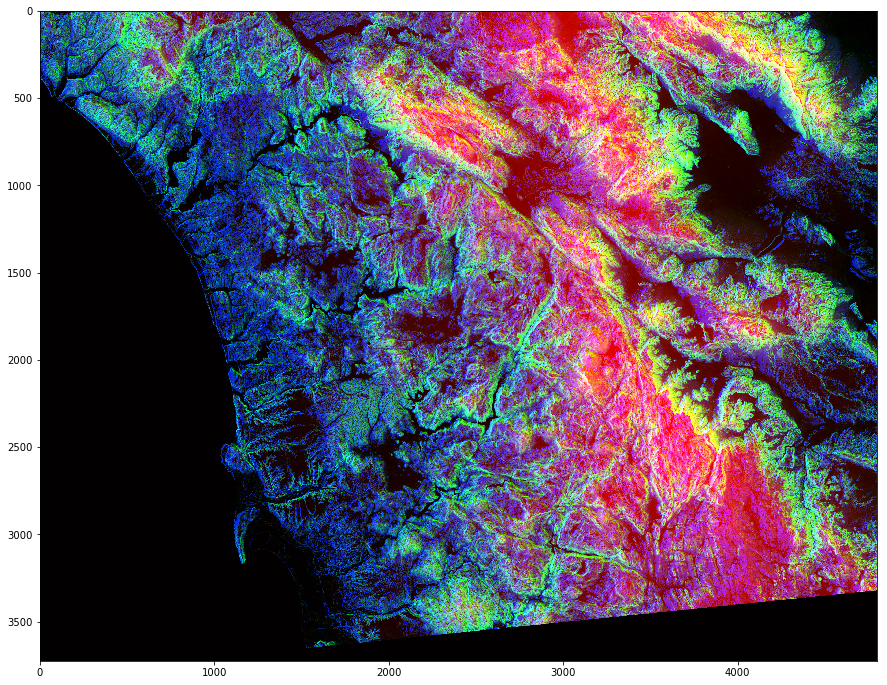

In [6]:
from skimage import data
photo_data = misc.imread('./wifire/sd-3layers.jpg')
plt.figure(figsize = (15,15))
plt.imshow(photo_data)

*THIS IS THE SATELITE IMAGE THAT WE WANTED TO BE USED FOR IMAGE PROCESSING*

Let's see a few more things about this image

In [7]:
photo_data.shape

(3725, 4797, 3)

THIS IS THE SHAPE OF THE NDARRAY THAT HOLDS THE IMAGE IT HAS 3725 ROWS 4797 COLOUMNS AND 3 LAYERS OF RGB COLOURS

In [9]:
#getting size of the image
photo_data.size

53606475

In [14]:
#mean of coloumns
#photo_data.mean(axis = 0)
print(photo_data.mean(axis = 0).shape)
#mean of rows
print(photo_data.mean(axis = 1).shape)


(4797, 3)
(3725, 3)


In [15]:
photo_data.mean()

75.829935450894695

In [17]:
photo_data.min()

0

In [18]:
photo_data.max()

255

# FILTERING IMAGES

In [22]:
photo_data = misc.imread('./wifire/sd-3layers.jpg')
low_value_filter = photo_data < 200 #this will create a matrix of true false equal to the size of photo_data
photo_data[low_value_filter] = 0 #boolean indexing



*showing the changed image now*

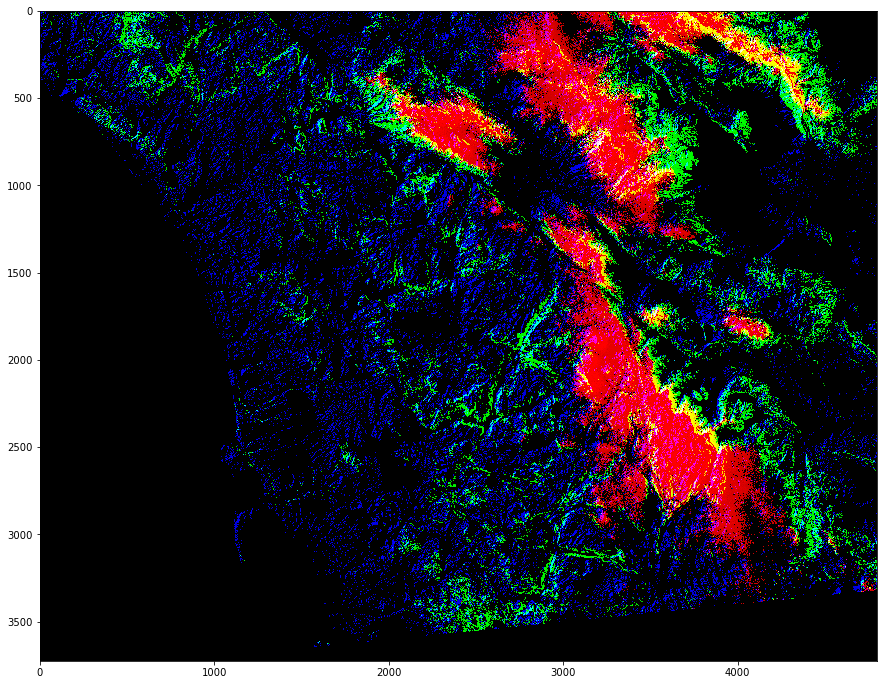

In [23]:
plt.figure(figsize = (15,15))
plt.imshow(photo_data)

*notice the image has become inconsistence after adding the filter actually it blacked out all those pixels with less RGB values*

# Masking Images

*how about if we cut a circle in this image that will be another type of filtering only a bit more complex*

In [54]:
photo_data = misc.imread('./wifire/sd-3layers.jpg')
total_rows,total_cols,total_layers = photo_data.shape
#vector arrays using ogrid fuction 
X,Y = np.ogrid[:total_rows,:total_cols]
print("shape of X",X.shape,"shape of Y ",Y.shape)

shape of X (3725, 1) shape of Y  (1, 4797)


*creating the circular mask using arbitary radius*

In [55]:
center_row,center_col = total_rows // 2 , total_cols // 2 
#print(center_row,center_col)
#print(X-center_row)
#print(Y-center_col)
dist_from_center = (X - center_row)**2 + (Y - center_col)**2
#print(dist_from_center)
radius = (total_rows // 2) ** 2
#print(radius)
circular_mask = (dist_from_center > radius)
#(circular_mask[1500:1700,2000:2200])




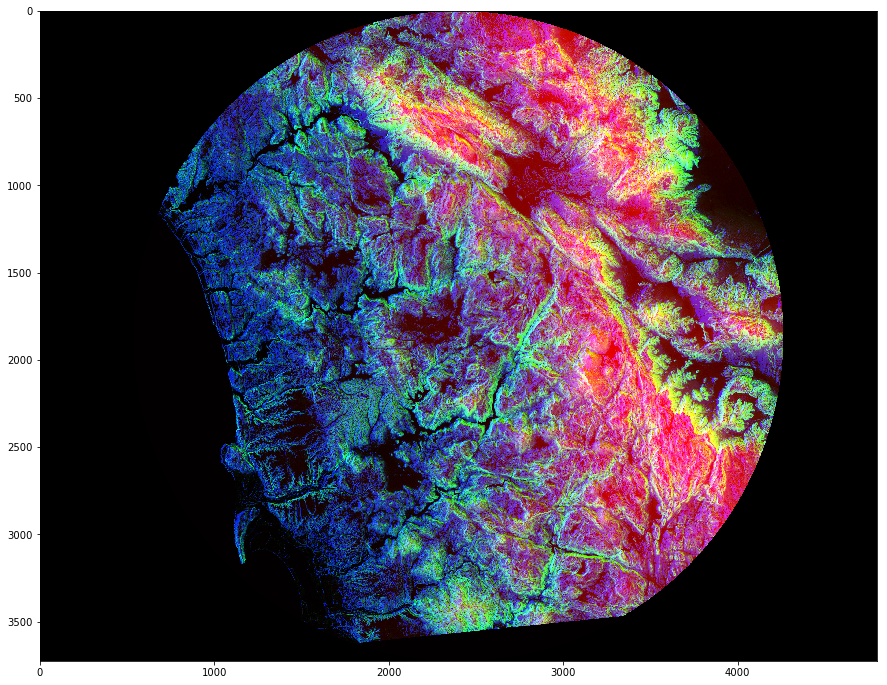

In [56]:
# showing the image
photo_data[circular_mask] = 0
plt.figure(figsize = (15,15))
plt.imshow(photo_data)

*A beautiful circular filter, let's play with filters a bit more*

In [58]:
half_circle = X < center_row
half_circular_mask = np.logical_and(half_circle,circular_mask)


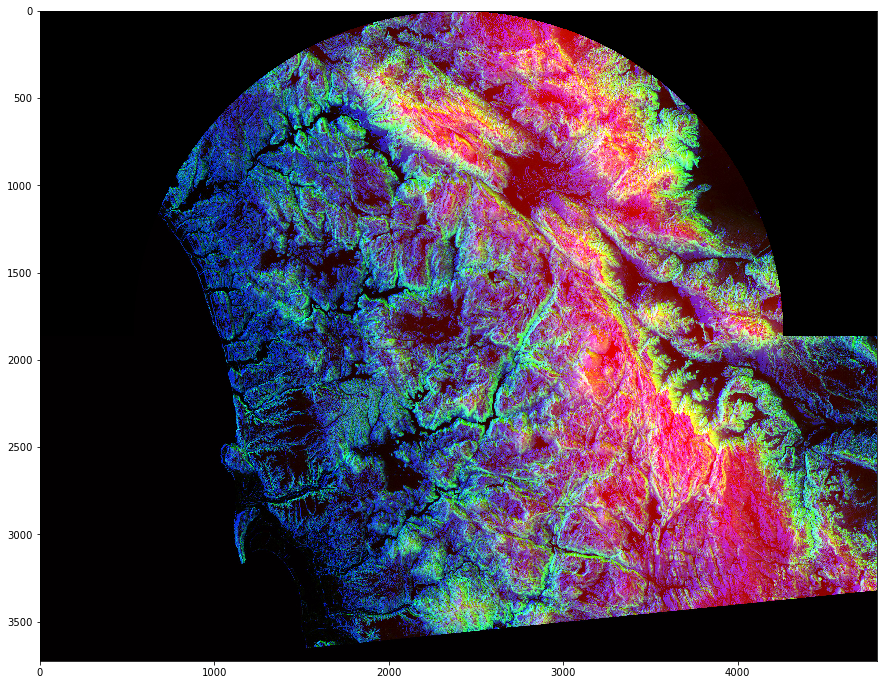

In [60]:
photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data[half_circular_mask] = 0
plt.figure(figsize = (15,15))
plt.imshow(photo_data)

# Highlighting different planes from the image

In [61]:
photo_data = misc.imread('./wifire/sd-3layers.jpg')
red_filter = photo_data[: , : , 0] < 150
green_filter = photo_data[: , : , 1] < 100
blue_filter = photo_data[: , : , 2] <100

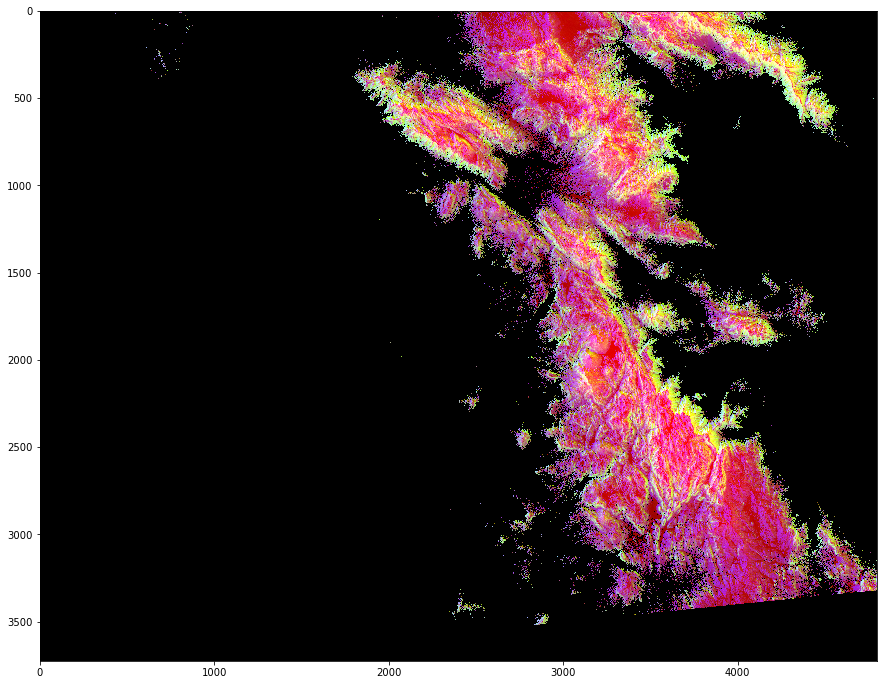

In [62]:
photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data[red_filter] = 0
plt.figure(figsize = (15,15))
plt.imshow(photo_data)

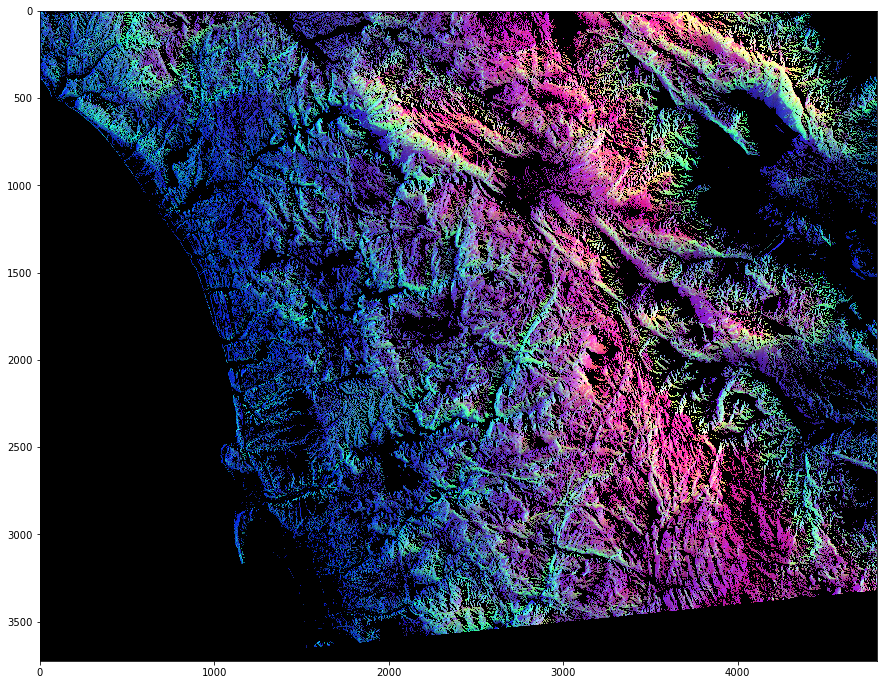

In [64]:
photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data[blue_filter] = 0
plt.figure(figsize = (15,15))
plt.imshow(photo_data)

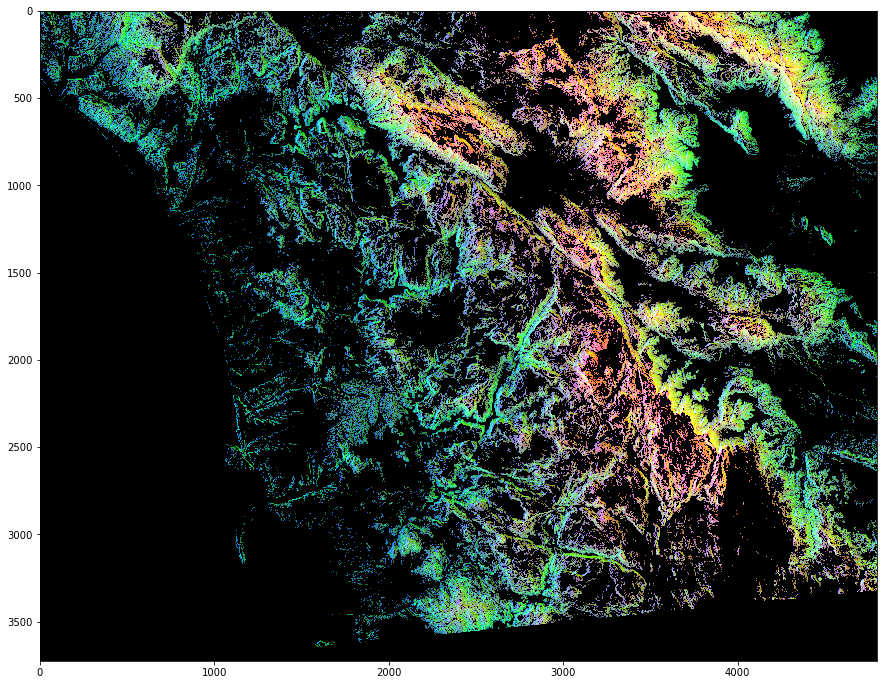

In [65]:
photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data[green_filter] = 0
plt.figure(figsize = (15,15))
plt.imshow(photo_data)

# combining these filters

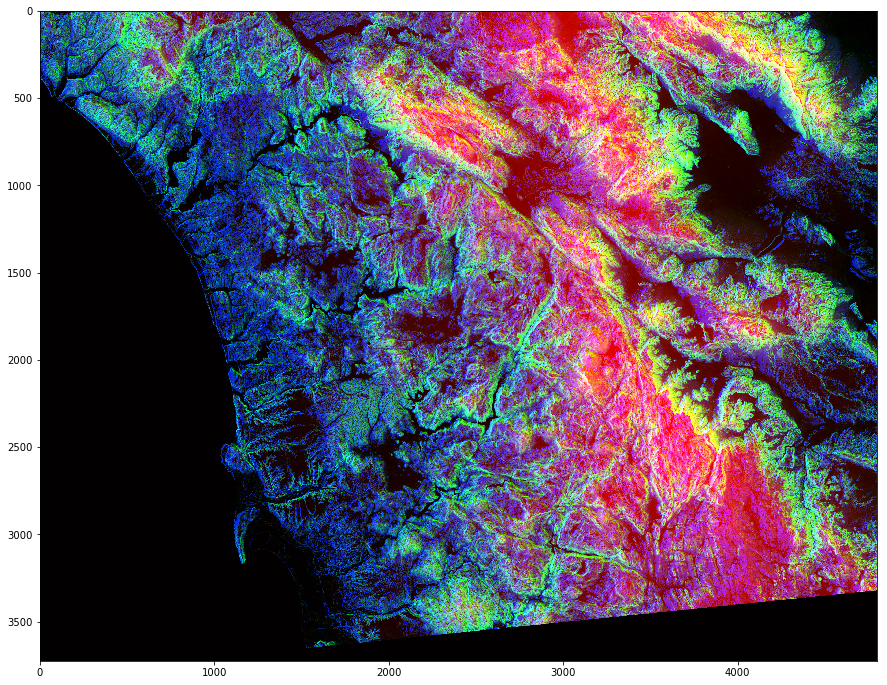

In [67]:
photo_data = misc.imread('./wifire/sd-3layers.jpg')
RGB_filter = np.logical_or(red_filter,blue_filter,green_filter)
photo_data[RGB_filter]
plt.figure(figsize = (15,15))
plt.imshow(photo_data)